## Note - Hidden cells from jupyter-notebooks are visible on github. I suggest to view this notebook on google colab on the below link
https://colab.research.google.com/github/tambeyash/kaggle_galaxy_zoo/blob/master/VGG16(training).ipynb#scrollTo=BaWNH8TQYYXG

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 345.2MB 69kB/s 


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 

Using TensorFlow backend.


In [ ]:
!unzip data2.zip

Archive:  data2.zip
   creating: data2/
  inflating: data2/100008.jpg        
  inflating: data2/100023.jpg        
  inflating: data2/100053.jpg        
  inflating: data2/100078.jpg        
  inflating: data2/100090.jpg        
  inflating: data2/100122.jpg        
  inflating: data2/100123.jpg        
  inflating: data2/100128.jpg        
  inflating: data2/100134.jpg        
  inflating: data2/100143.jpg        
  inflating: data2/100150.jpg        
  inflating: data2/100157.jpg        
  inflating: data2/100187.jpg        
  inflating: data2/100204.jpg        
  inflating: data2/100237.jpg        
  inflating: data2/100259.jpg        
  inflating: data2/100263.jpg        
  inflating: data2/100288.jpg        
  inflating: data2/100295.jpg        
  inflating: data2/100322.jpg        
  inflating: data2/100335.jpg        
  inflating: data2/100367.jpg        
  inflating: data2/100380.jpg        
  inflating: data2/100382.jpg        
  inflating: data2/100383.jpg        
  inflatin

In [ ]:
train = pd.read_csv('training_solutions_rev1.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.0,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.0,0.027226,0.000000,0.027226,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.0,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.0,0.000000,0.140353,0.000000,0.048796,0.000000,0.0,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.0,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.0,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.0,0.000000,0.096119,0.096119,0.000000,0.128159,0.0,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.029383,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
train.columns

Index(['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2',
       'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2',
       'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2',
       'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5',
       'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

In [ ]:
import glob
import cv2
filenames = glob.glob("data2/*.jpg")
filenames.sort()

In [ ]:
filenames

['data2/100008.jpg',
 'data2/100023.jpg',
 'data2/100053.jpg',
 'data2/100078.jpg',
 'data2/100090.jpg',
 'data2/100122.jpg',
 'data2/100123.jpg',
 'data2/100128.jpg',
 'data2/100134.jpg',
 'data2/100143.jpg',
 'data2/100150.jpg',
 'data2/100157.jpg',
 'data2/100187.jpg',
 'data2/100204.jpg',
 'data2/100237.jpg',
 'data2/100259.jpg',
 'data2/100263.jpg',
 'data2/100288.jpg',
 'data2/100295.jpg',
 'data2/100322.jpg',
 'data2/100335.jpg',
 'data2/100367.jpg',
 'data2/100380.jpg',
 'data2/100382.jpg',
 'data2/100383.jpg',
 'data2/100402.jpg',
 'data2/100428.jpg',
 'data2/100434.jpg',
 'data2/100444.jpg',
 'data2/100445.jpg',
 'data2/100458.jpg',
 'data2/100474.jpg',
 'data2/100479.jpg',
 'data2/100506.jpg',
 'data2/100513.jpg',
 'data2/100520.jpg',
 'data2/100541.jpg',
 'data2/100561.jpg',
 'data2/100571.jpg',
 'data2/100601.jpg',
 'data2/100623.jpg',
 'data2/100672.jpg',
 'data2/100673.jpg',
 'data2/100724.jpg',
 'data2/100727.jpg',
 'data2/100730.jpg',
 'data2/100740.jpg',
 'data2/10074

In [ ]:
import random
import cv2
loaded_images = []
for img in filenames:
  img1 = cv2.imread(img)
  img = img1[106:318,106:318]
  num_rows, num_cols = img.shape[:2]
  rotate = random.randint(0, 360)
  rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), rotate, 1)
  img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
  loaded_images.append(img_rotation)

In [ ]:
x = np.asarray(loaded_images)

In [ ]:
x.shape

(6655, 212, 212, 3)

In [ ]:
train1 = train.iloc[0:6655]

In [ ]:
y = np.array(train1.drop(['GalaxyID'],axis=1))
y.shape

(6655, 37)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding = 'same', input_shape=(212,212,3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(37, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 212, 212, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 212, 212, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 106, 106, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 128)       0         
_________________________________________________________________
conv

In [ ]:
from keras.models import Sequential, Model
from keras.layers.core import Reshape
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation
from keras.optimizers import SGD, RMSprop, Adam
import tensorflow as tf

In [ ]:
with tf.device('/gpu:0'):
  optimizer = RMSprop(lr=1e-6)
  model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 4991 samples, validate on 1664 samples
Epoch 1/20
4991/4991 [==============================] - 103s 21ms/step - loss: 0.0849 - acc: 0.5364 - val_loss: 0.0297 - val_acc: 0.6172
Epoch 2/20
4991/4991 [==============================] - 79s 16ms/step - loss: 0.0267 - acc: 0.6045 - val_loss: 0.0256 - val_acc: 0.6172
Epoch 3/20
4991/4991 [==============================] - 79s 16ms/step - loss: 0.0247 - acc: 0.6039 - val_loss: 0.0243 - val_acc: 0.6160
Epoch 4/20
4991/4991 [==============================] - 79s 16ms/step - loss: 0.0235 - acc: 0.6065 - val_loss: 0.0235 - val_acc: 0.6172
Epoch 5/20
4991/4991 [==============================] - 79s 16ms/step - loss: 0.0226 - acc: 0.6029 - val_loss: 0.0227 - val_acc: 0.6082
Epoch 6/20
4991/4991 [==============================] - 79s 16ms/step - loss: 0.0219 - acc: 0.6117 - val_loss: 0.0234 - val_acc: 0.5589
Epoch 7/20
4991/4991 [==============================] - 79s 16ms/step - loss: 0.0214 - 

Class7.1 (0.832)
Class1.3 (0.665)
Class3.1 (0.637)


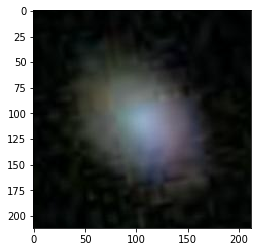

In [ ]:
img = cv2.imread('101713.jpg')
plt.imshow(img)
img = img[106:318,106:318]
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,212,212,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Class7.1 (0.811)
Class1.2 (0.692)
Class7.2 (0.575)


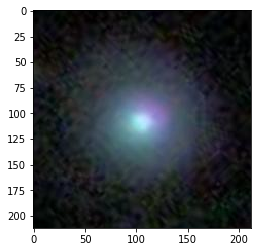

In [ ]:
img = cv2.imread('414028.jpg')
plt.imshow(img)
img = img[106:318,106:318]
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,212,212,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [ ]:
model.save("galaxy_classification.h5")